# Decision Tree

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
dataset = pd.read_csv('Experiment3.csv', index_col=0)

In [69]:
dataset.shape

(104, 33)

In [70]:
X = dataset.drop('Label', axis=1)
y = dataset['Label']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#test30%train70%

In [72]:
X_train

,Gx: Average,Gy: Average,Gz: Average,Ax: Average,Ay: Average,Az: Average,Gx: Standard deviation,Gy: Standard deviation,Gz: Standard deviation,Ax: Standard deviation,...,Ax.2:FFT,Ax.3:fft,Ay.1:FFT,Ay.2:FFT,Ay.3:FFT,Az.1:FFT,Az.2:FFT,Az.3:FFT,G_ODBA,A_ODBA
Time window,,,,,,,,,,,,,,,,,,,,,
21:14:59,-903.702703,48.702703,136.297297,-9038.387387,12464.747750,8146.333333,4210.656122,4221.040633,3444.265547,2303.904674,...,1405.017016,352.611359,27600.0,1050.0,434.0,18200.00,1250.000000,1200.000000,10222.586160,18594.088900
21:14:49,108.964602,50.398230,29.761062,-14439.026550,6098.796460,-2759.176991,201.333276,138.488946,209.308183,227.981338,...,224.000000,224.000000,13800.0,96.0,191.0,6230.00,107.000000,132.000000,541.136055,4108.314474
4:49:47 PM,1575.333000,-394.667000,-8.000000,11951.670000,-7370.000000,-5392.000000,157.296959,604.119469,182.107111,386.824680,...,167.000000,310.000000,15900.0,166.0,225.0,13000.00,224.000000,424.000000,2208.907667,1420.435667
4:49:50 PM,197.876100,368.991200,205.212400,11620.760000,-6981.580000,-5890.440000,581.365958,1663.075268,619.866049,638.922395,...,178.000000,154.000000,16300.0,70.2,216.0,13700.00,151.000000,205.000000,2393.666929,1473.141814
4:49:49 PM,-172.180000,95.459460,-53.441400,11683.200000,-7109.650000,-5804.950000,526.803658,1546.305020,656.862691,585.253571,...,341.000000,272.000000,16600.0,151.0,188.0,13300.00,167.000000,38.000000,2265.479288,1478.003955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21:15:28,25.991150,-49.053097,-15.752212,-13388.690270,6811.380531,-4577.486726,258.106723,280.837486,250.618076,181.929690,...,122.000000,36.100000,15400.0,266.0,82.5,10300.00,160.000000,47.600000,638.379240,4160.498520
7:46:53 AM,126.561400,51.271930,81.640350,4290.518000,-13613.600000,1455.781000,173.115953,167.808218,202.497422,182.076967,...,49.000000,29.900000,3360.0,104.0,72.7,30600.00,63.400000,81.400000,521.139943,518.461248
21:14:44,-11.008929,111.133929,42.160714,-14336.196430,6055.830357,-2882.687500,270.958010,518.343924,274.880107,302.737118,...,80.000000,280.000000,13600.0,150.0,194.0,6470.00,60.700000,213.000000,906.346464,4174.509253


In [73]:
y_train

Time window
21:14:59      Sleep
21:14:49      Sleep
4:49:47 PM      Eat
4:49:50 PM      Eat
4:49:49 PM      Eat
              ...  
21:15:28      Sleep
7:46:53 AM      Eat
21:14:44      Sleep
21:15:00      Sleep
7:45:09 AM      Eat
Name: Label, Length: 72, dtype: object

In [74]:
X_test

,Gx: Average,Gy: Average,Gz: Average,Ax: Average,Ay: Average,Az: Average,Gx: Standard deviation,Gy: Standard deviation,Gz: Standard deviation,Ax: Standard deviation,...,Ax.2:FFT,Ax.3:fft,Ay.1:FFT,Ay.2:FFT,Ay.3:FFT,Az.1:FFT,Az.2:FFT,Az.3:FFT,G_ODBA,A_ODBA
Time window,,,,,,,,,,,,,,,,,,,,,
21:15:23,298.726415,44.037736,-160.915094,-14421.009430,5217.886792,-4123.481132,1192.740083,1374.843249,834.204966,691.553028,...,417.000000,457.000000,11080.32,133.935951,91.296447,8730.00,662.000000,349.000000,2268.196356,6364.599606
7:46:58 AM,68.534480,49.982760,83.655170,4686.974000,-13504.300000,1484.078000,105.773378,159.211425,161.514038,88.385368,...,406.521600,388.276911,13800.00,91.800000,393.000000,29400.00,199.000000,579.000000,430.414220,457.971082
21:15:29,37.194690,58.159292,26.716814,-13403.796460,6799.884956,-4599.309735,533.510508,357.325796,211.305739,278.850035,...,158.000000,26.700000,15400.00,245.000000,81.700000,10400.00,182.000000,96.200000,871.132389,4209.001893
11:38:12 AM,323.649100,96.649120,150.842100,2018.754000,-5989.110000,-13235.100000,773.860810,380.487023,1419.865723,1055.214489,...,276.946949,580.257081,14000.00,255.000000,239.000000,29700.00,51.900000,567.000000,2165.475193,1973.431474
7:45:06 AM,-566.673000,355.736400,-9.727270,1754.800000,-7330.820000,-12561.200000,928.910086,803.596111,830.668625,633.869127,...,193.000000,743.000000,14700.00,170.000000,84.400000,24800.00,250.000000,194.000000,2138.139636,1807.625582
21:14:55,-120.097345,506.327434,109.168142,-14353.070800,6095.566372,-2972.407080,260.878152,642.554854,269.610298,275.853731,...,108.000000,313.000000,13800.00,134.000000,173.000000,6730.00,80.400000,86.600000,1028.774227,4235.613564
21:15:04,127.234234,1608.855856,827.297297,-7272.828829,11891.738740,10675.144140,3439.295200,3187.221391,2396.010694,2166.022068,...,1980.000000,373.000000,26400.00,410.000000,995.000000,23600.00,606.000000,1060.000000,8140.172954,22288.351990
21:14:50,8.790909,-2.681818,43.618182,-14325.745450,6094.154545,-2837.672727,215.631528,161.118335,213.539287,254.061194,...,174.000000,264.000000,13400.00,82.300000,190.000000,6250.00,54.100000,175.000000,521.974600,4074.965696
4:46:08 PM,-32.137600,1178.339000,329.339400,11148.340000,-5621.020000,-7607.690000,863.837700,1772.509000,830.063300,962.109700,...,386.000000,228.000000,16900.00,276.000000,398.000000,16900.00,276.000000,398.000000,3361.136183,2289.312193


In [75]:
y_test

Time window
21:15:23       Sleep
7:46:58 AM       Eat
21:15:29       Sleep
11:38:12 AM      Eat
7:45:06 AM       Eat
21:14:55       Sleep
21:15:04       Sleep
21:14:50       Sleep
4:46:08 PM       Eat
21:14:48       Sleep
7:45:00 AM       Eat
21:14:52       Sleep
21:15:06       Sleep
21:15:18       Sleep
21:14:45       Sleep
7:46:57 AM       Eat
4:49:56 PM       Eat
4:46:09 PM       Eat
21:14:53       Sleep
21:14:42       Sleep
4:48:03 PM       Eat
7:46:55 AM       Eat
21:15:10       Sleep
21:15:14       Sleep
21:15:25       Sleep
7:45:04 AM       Eat
4:49:48 PM       Eat
7:46:56 AM       Eat
21:15:07       Sleep
4:48:02 PM       Eat
7:45:05 AM       Eat
21:15:02       Sleep
Name: Label, dtype: object

Decision tree Test data

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0]
 [ 0 17]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        15
       Sleep       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]


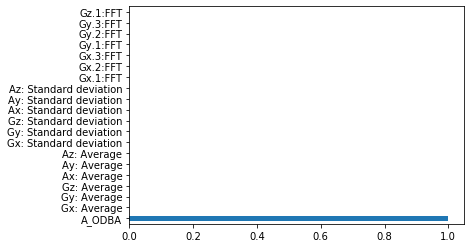

In [79]:
print(classifier.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [80]:
#from sklearn.tree.export import export_txt
from sklearn.tree import export_text

tree_rules = export_text(classifier, feature_names=list(X_train))
print(tree_rules)

|--- A_ODBA <= 2865.52
|   |--- class: Eat
|--- A_ODBA >  2865.52
|   |--- class: Sleep



Decision tree Train data

In [81]:
y_pred1 = classifier.predict(X_train)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[39  0]
 [ 0 33]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        39
       Sleep       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



# LGregression

In [83]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

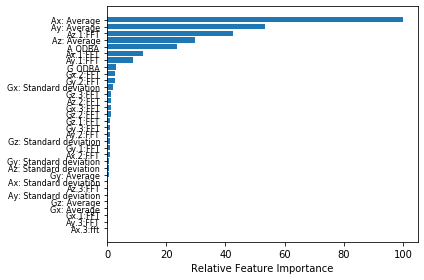

In [85]:
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

LGR Test data

In [86]:
#predictions
Predictions = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, Predictions))

print(classification_report(y_test,Predictions))

[[15  0]
 [ 0 17]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        15
       Sleep       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



LGR Train data

In [88]:
#predictions
Predictions1 = logmodel.predict(X_train)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, Predictions1))

print(classification_report(y_train,Predictions1))

[[39  0]
 [ 0 33]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        39
       Sleep       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



# PCA_LGregression

In [90]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

In [91]:
# feature extraction

#pca = PCA(n_components=3)
#0.47835969 0.24506417 0.07111566 0.04266408 0.03324241 0.02682371
#0.01876772 0.01613762 0.01532451 0.0092178 rawdata

pca = PCA(.95)
#0.58764358 0.20305845 0.09932105 scaleddata
fit = pca.fit(X,y)

In [92]:
fit

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

#0.47835969 0.24506417 0.07111566 0.04266408 0.03324241 0.02682371
#0.01876772 0.01613762 0.01532451 0.0092178

#0.58764358 0.20305845 0.09932105

Explained Variance: [0.55706549 0.22553539 0.10540334 0.04655587 0.03013409]
[[-1.45991205e-03  3.17126764e-04  3.35489374e-03 -5.32134279e-01
   4.37113353e-01  1.56535456e-01  1.75657940e-02  2.02991917e-02
   1.00244260e-02  6.15028294e-03  7.58060589e-03  6.33150616e-03
   7.48459068e-03  2.27028029e-02  1.45198644e-02  1.90334228e-02
   2.71001297e-02  1.23567819e-02  1.72249422e-02  1.22709903e-02
   8.79449997e-03  4.91292426e-01  6.93934557e-03  7.73392607e-04
   1.69521992e-01  9.17177069e-03  4.23030066e-03 -4.43898225e-01
   1.26417492e-02  3.55330019e-03  4.39153721e-02  1.68321386e-01]
 [ 1.00804720e-03  1.41007459e-03 -2.50370913e-03 -2.56794826e-01
   1.68770751e-01  2.92151268e-01  8.63793533e-02  7.39846887e-02
   6.60690027e-02  4.49477525e-02  3.25977228e-02  4.64086585e-02
   2.65848384e-02  9.06973958e-02  5.60566240e-02  5.93788783e-02
   9.10796349e-02  4.77949069e-02  2.91952969e-02  3.97967117e-02
   5.65904719e-02 -5.44880206e-01  3.63645304e-02  1.82148123e-0

In [94]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

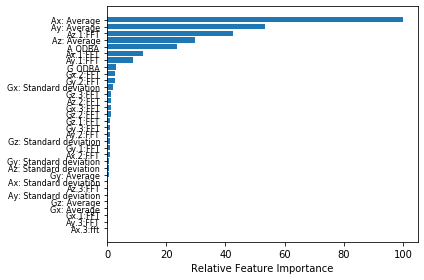

In [95]:
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Pre+LGR test data

In [96]:
#predictions
Predictions = logmodel.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, Predictions))

print(classification_report(y_test,Predictions))

[[15  0]
 [ 0 17]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        15
       Sleep       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



Pre+LGR train data

In [98]:
#predictions
Predictions1 = logmodel.predict(X_train)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, Predictions1))

print(classification_report(y_train,Predictions1))

[[39  0]
 [ 0 33]]
              precision    recall  f1-score   support

         Eat       1.00      1.00      1.00        39
       Sleep       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

